In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("loans_2007.csv")
df.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Satır ve Sütün Sayıları

In [3]:
print("Satır Sayısı: ",  df.shape[0])
print("Sütun Sayısı: ",  df.shape[1])

Satır Sayısı:  42538
Sütun Sayısı:  52


### Veri Temizleme

In [4]:
removed_columns = ["id","member_id","funded_amnt","funded_amnt_inv","grade","sub_grade","emp_title", "issue_d","zip_code","out_prncp","out_prncp_inv",
             "total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d",
             "last_pymnt_amnt"]
df = df.drop(removed_columns,axis=1)

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [6]:
print("Satır Sayısı:", df.shape[0])
print("Sütun Sayısı:", df.shape[1])

Satır Sayısı: 42538
Sütun Sayısı: 32


### Veri Temizleme

In [7]:
print(df.loan_status.value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


In [8]:
df = df[(df["loan_status"] == "Fully Paid") |
        (df["loan_status"] == "Charged Off")]

Bizim için gerekli olmayan ara bilgilerden kurtulduk

In [9]:
print(df.loan_status.value_counts())

Fully Paid     33136
Charged Off     5634
Name: loan_status, dtype: int64


### Kategorik olan veriyi sayısal veriye çevirme

In [10]:
df["loan_status"] = pd.get_dummies(df["loan_status"])

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,0,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,1,n,...,f,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,0,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,0,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,0,n,...,f,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Bütün değerleri aynı olan değişkenleri bulma

In [12]:
drop_columns = []
for col in df.columns:
    is_unique = len(df[col].dropna().unique())
    if is_unique == 1:
        drop_columns.append(col)

In [13]:
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
df = df.drop(drop_columns, axis=1)

In [15]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,0,credit_card,...,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Jun-2016,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,1,car,...,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2013,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,0,small_business,...,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Jun-2016,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,0,other,...,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,0,wedding,...,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0


### Boş değerleri kontrol etme

In [16]:
null = df.isna().sum()
null[null > 0]

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [17]:
print(df.pub_rec_bankruptcies.value_counts(normalize=True))

0.0    0.956636
1.0    0.043233
2.0    0.000131
Name: pub_rec_bankruptcies, dtype: float64


pub_rec_bankruptcies sütununun altındaki değerlerin %95 i "0.0" değerinden oluşuyor. Bu değer algoritma için fayda sağlamaz.

In [18]:
df = df.drop("pub_rec_bankruptcies",axis=1)

In [19]:
df = df.dropna(axis=0)

In [20]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

### Veri Tiplerini Hazırlama

In [21]:
df.dtypes.value_counts()

object     11
float64    10
uint8       1
dtype: int64

In [22]:
object_df = df.select_dtypes(include = ["object"])
object_df.head()

,term,int_rate,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Jun-2016
1,60 months,15.27%,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Sep-2013
2,36 months,15.96%,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2016
3,36 months,13.49%,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,7.90%,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016


In [23]:
cols = ["home_ownership","verification_status","emp_length","term","addr_state"]

for col in cols:
    print(df[col].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
UT     249
KS     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      60
VT  

In [24]:
df["purpose"].value_counts()         # krediyi ne amaçla almış

debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64

In [25]:
df["title"].value_counts()   # kredi almasının detayı (bu aşamada gerek yok)

Debt Consolidation                     2068
Debt Consolidation Loan                1599
Personal Loan                           624
Consolidation                           488
debt consolidation                      466
                                       ... 
7k Personal Loan                          1
Home Appliances                           1
Summer Financial Emergency Recovery       1
solid                                     1
REC                                       1
Name: title, Length: 18881, dtype: int64

In [26]:
df = df.drop(["last_credit_pull_d","addr_state","title","earliest_cr_line"],axis=1)

bizim için önemli olmadığını düşündüğümüz kategorik değişkenlerden kurtulduk

In [27]:
df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float64")
df["revol_util"] = df["revol_util"].str.rstrip("%").astype("float64")

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,0,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,1,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,0,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,3 years,RENT,36000.0,Source Verified,0,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0


In [29]:
mapping_dict = {
    "emp_length" : {
        "10+ years": 10,
        "9 years":9,
        "8 years":8,    
        "7 years":7,      
        "6 years":6,    
        "5 years":5,      
        "4 years" :4,
        "3 years":3,      
        "2 years":2,    
        "1 year":1,
        "< 1 year":0,    
        "n/a":0     
        
    }
}

df = df.replace(mapping_dict)

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,0,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,1,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,0,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,0,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0


In [31]:
dummy_df = pd.get_dummies(df[["term","verification_status","home_ownership","purpose"]])

In [32]:
dummy_df.head()

,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
names = dummy_df.columns.tolist()
names[names.index('term_ 36 months')] = 'term_36_months'
dummy_df.columns = names

In [35]:
names = dummy_df.columns.tolist()
names[names.index('term_ 60 months')] = 'term_60_months'
dummy_df.columns = names

In [36]:
names = dummy_df.columns.tolist()
names[names.index('verification_status_Not Verified')] = 'verification_status_Not_Verified'
dummy_df.columns = names

In [37]:
names = dummy_df.columns.tolist()
names[names.index('verification_status_Source Verified')] = 'verification_status_Source_Verified'
dummy_df.columns = names

In [38]:
dummy_df.head()

,term_36_months,term_60_months,verification_status_Not_Verified,verification_status_Source_Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df = pd.concat([df,dummy_df],axis=1)

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,0,credit_card,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,1,car,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,0,small_business,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,0,other,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,0,wedding,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df = df.drop(["term","verification_status","home_ownership","purpose"],axis=1)

In [42]:
df.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,10.65,162.87,10,24000.0,0,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,0,30000.0,1,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,10,12252.0,0,8.72,0.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,339.31,10,49200.0,0,20.00,0.0,1.0,10.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,7.90,156.46,3,36000.0,0,11.20,0.0,3.0,9.0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37675 non-null  float64
 1   int_rate                             37675 non-null  float64
 2   installment                          37675 non-null  float64
 3   emp_length                           37675 non-null  int64  
 4   annual_inc                           37675 non-null  float64
 5   loan_status                          37675 non-null  uint8  
 6   dti                                  37675 non-null  float64
 7   delinq_2yrs                          37675 non-null  float64
 8   inq_last_6mths                       37675 non-null  float64
 9   open_acc                             37675 non-null  float64
 10  pub_rec                              37675 non-null  float64
 11  revol_bal                   

## Tahmin algoritması ile Kredi Tahminleme

In [44]:
X = df.drop(["loan_status"],axis=1)
y = df["loan_status"]

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.30)

### LogisticRegression

In [75]:
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [76]:
y_pred = log_model.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred)

0.8575599398389808

### RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [52]:
y_pred = rf_model.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.8561443864460763

### GBM

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [56]:
y_pred = gbm_model.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.8557904980978501

### LGBM

In [58]:
from lightgbm import LGBMClassifier

In [61]:
Lgbm_model =LGBMClassifier().fit(X_train,y_train)

In [62]:
y_pred = Lgbm_model.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.8546403609661152

### CatBoost

In [64]:
from catboost import CatBoostClassifier

In [65]:
cb_model = CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.041664
0:	learn: 0.6648552	total: 188ms	remaining: 3m 7s
1:	learn: 0.6389709	total: 199ms	remaining: 1m 39s
2:	learn: 0.6150290	total: 207ms	remaining: 1m 8s
3:	learn: 0.5931732	total: 216ms	remaining: 53.7s
4:	learn: 0.5733653	total: 224ms	remaining: 44.6s
5:	learn: 0.5566165	total: 232ms	remaining: 38.5s
6:	learn: 0.5406558	total: 240ms	remaining: 34.1s
7:	learn: 0.5264598	total: 249ms	remaining: 30.8s
8:	learn: 0.5136815	total: 257ms	remaining: 28.3s
9:	learn: 0.5031079	total: 265ms	remaining: 26.2s
10:	learn: 0.4918869	total: 273ms	remaining: 24.6s
11:	learn: 0.4817728	total: 282ms	remaining: 23.2s
12:	learn: 0.4729139	total: 291ms	remaining: 22.1s
13:	learn: 0.4642952	total: 299ms	remaining: 21.1s
14:	learn: 0.4568661	total: 308ms	remaining: 20.2s
15:	learn: 0.4504070	total: 316ms	remaining: 19.4s
16:	learn: 0.4438758	total: 325ms	remaining: 18.8s
17:	learn: 0.4390027	total: 333ms	remaining: 18.2s
18:	learn: 0.4338691	total: 342ms	remaining: 17.7s
19:	learn:

In [66]:
y_pred = cb_model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.8551711934884544

### CART

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

In [70]:
y_pred = dt_model.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred)

0.7627178625143767

### LGBM(Model Tuning)

In [78]:
lgbm = LGBMClassifier()

In [79]:
?lgbm

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\lenovo\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (de

In [80]:
lgbm_params = {"n_estimators":[100,200,500,1000],
             "max_depth":[-2,-1,1,4,5],
             "learning_rate":[0.1,0.001,0.01,1]}

In [81]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [82]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}

In [83]:
lgbm_tuned =LGBMClassifier(n_estimators=1000 ,max_depth=4 ,learning_rate=0.01).fit(X_train,y_train)

In [84]:
y_pred = lgbm_tuned.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.8563213306201893

### Değişkenlerin Önem düzeyi

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

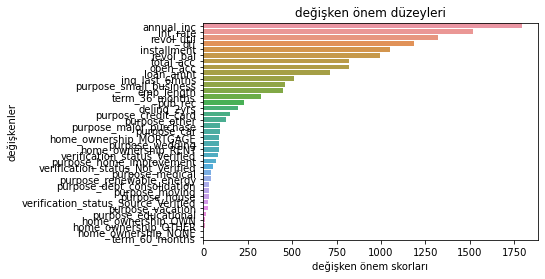

In [111]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skorları")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri")

plt.show()